Techniques de visualisation de données

3 - Exercices d'application

3.1 - Exercice 1
Les graphiques ci-après représentent l'évolution quantitative des disciplines des thèses sur la période 1985-2018. On commence par importer le fichier de données et vérifier la liste des disciplines uniques.

In [54]:
# importer les modules nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# import de la police Garamond
garamond_font = FontProperties(fname="C:/Windows/Fonts/GARA.TTF",size=14)
timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

# lire le fichier csv dans un dataframe et afficher la liste des disciplines
df = pd.read_csv("C:/Users/Robin/Downloads/PhD_v3.csv",header=0,sep=",", low_memory=False)
print("Liste des colonnes\n\n", df.columns)
print("\n\nListe des disciplines uniques\n\n", df["Discipline_prÃ©di"].unique())

Liste des colonnes

 Index(['Unnamed: 0', 'Auteur', 'Identifiant auteur', 'Titre', 'Directeur de these',
       'Directeur de these (nom prenom)', 'Identifiant directeur', 'Etablissement de soutenance',
       'Identifiant etablissement', 'Discipline', 'Statut',
       'Date de premiere inscription en doctorat', 'Date de soutenance', 'Year',
       'Langue de la these', 'Identifiant de la these', 'Accessible en ligne',
       'Publication dans theses.fr', 'Mise a jour dans theses.fr', 'Discipline_prÃ©di', 'Genre',
       'etablissement_rec', 'Langue_rec'],
      dtype='object')


Liste des disciplines uniques

 ['Droit et Science Politique' 'Materiaux, Milieux et Chimie' 'Medecine'
 'SHS' 'Biologie' 'Langues et Litteratures' 'Psychologie'
 'Economie Gestion' 'Informatique' "Science de l'ingÃ©nieur" 'Poubelle'
 "Sciences de l'education" 'MathÃ©matiques' 'Science de la Terre'
 'Mathematiques et Informatique']


On sélectionne ensuite uniquement les données correspondant aux années 1985 à 2018, puis on regroupe les données par Année et Discipline. On obtient bien le nombre de thèses par disciplines et par année.

In [40]:
# ajout des colonnes Annee, Mois
df["Annee"] = ((pd.to_datetime(df["Date de soutenance"])).dt.year.convert_dtypes())

# filtre sur les années 2005 à 2008
df_1985_2018 = df[(df["Annee"]>=1985) & (df["Annee"]<=2018)]
df_1985_2018 = df_1985_2018.sort_values("Annee",ascending=True)

# regrouper les données par discipline prédit et année, et compter les résultats
df_grouped = df_1985_2018.groupby(["Annee","Discipline_prÃ©di"],as_index=False).count()

# affichage du dataframe, qques colonnesn pour vérifier le format
df_grouped.rename(columns={"Auteur":"nb_theses"},inplace=True)
print(df_grouped[["nb_theses","Discipline_prÃ©di","Annee"]])

     nb_theses           Discipline_prÃ©di  Annee
0          695                    Biologie   1985
1          168  Droit et Science Politique   1985
2          220            Economie Gestion   1985
3           45                Informatique   1985
4          268     Langues et Litteratures   1985
..         ...                         ...    ...
500        256                 Psychologie   2018
501       1525                         SHS   2018
502       1396     Science de l'ingÃ©nieur   2018
503        471         Science de la Terre   2018
504         45     Sciences de l'education   2018

[505 rows x 3 columns]


Représentation des données en utilisant un Stack area plot.

Le Dataframe est d'abord transformé en table pivot, les valeurs manquantes sont mises à 0 pour éviter d'avoir une discipline "Poubelle", puis on initialise l'index pour que le champ Année redevienne une colonne. Enfin, on renomme quelques colonnes mal formattées dans le fichier.

In [41]:
# pivot
df_pivot = pd.pivot_table(df_grouped,index="Discipline_prÃ©di",values="nb_theses",columns="Annee")
df_ToStack = df_pivot.fillna(0)
df_ToStack =df_ToStack.T.reset_index()

# correction des erreurs de syntaxe propres au fichier de données
df_ToStack.rename(columns={ "Science de l'ingÃ©nieur":"Science de l'ingénieur",
                            "Sciences de l'education":"Sciences de l'éducation",
                            "Medecine":"Médecine",
                            "Langues et Litteratures":"Langues et Littératures",
                            "Materiaux, Milieux et Chimie":"Matériaux, Milieux et Chimie",
                            "MathÃ©matiques":"Mathématiques",
                            "Mathematiques et Informatique":"Mathématiques et Informatique"
                            },inplace=True)

# fabrication des listes pour stackplot
category = df_ToStack["Annee"].tolist()
values = df_ToStack[[   "Science de l'ingénieur",
                        "Science de la Terre",
                        "Sciences de l'éducation",
                        "Droit et Science Politique",
                        "Economie Gestion",
                        "Langues et Littératures",
                        "Matériaux, Milieux et Chimie",
                        "SHS",
                        "Informatique",
                        "Mathématiques",
                        "Mathématiques et Informatique",
                        "Médecine",
                        "Biologie",
                        "Psychologie"
                ]].values.T.tolist()

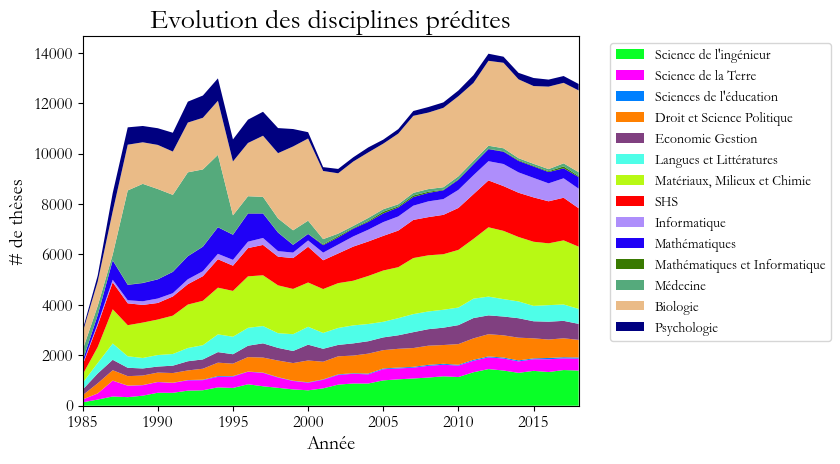

In [56]:
# generation des couleurs
N = 36
colors = distinctipy.get_colors(N)

labels=[                                    "Science de l'ingénieur",
                                            "Science de la Terre",
                                            "Sciences de l'éducation",
                                            "Droit et Science Politique",
                                            "Economie Gestion",
                                            "Langues et Littératures",
                                            "Matériaux, Milieux et Chimie",
                                            "SHS",
                                            "Informatique",
                                            "Mathématiques",
                                            "Mathématiques et Informatique",
                                            "Médecine",
                                            "Biologie",
                                            "Psychologie"
                                            ]

# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors)
font = {'family': "Garamond", 'size': 10}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=garamond_font,size=20)
plt.xlabel("Année", fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.ylabel("# de thèses",fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.xticks(fontname='Garamond', fontsize=12)
plt.yticks(fontname='Garamond', fontsize=12)
plt.show()

Même données que précédemment mais cette fois en utilisant un Stack bar plot.

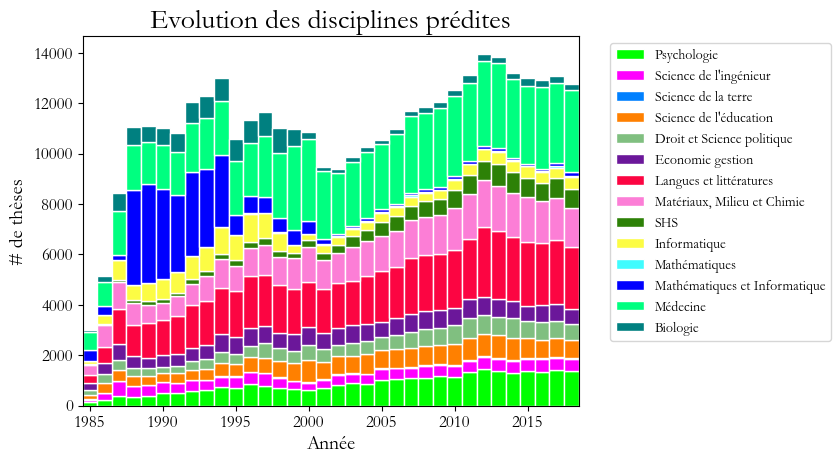

In [43]:
# idem mais avec un stack bar plot

# bar width and labels
barWidth = 1
labels = [1985,1990,1995,2000,2005,2010,2015]

# variables pour stocker les sommes de barres
bottom1 = values[0]
bottom2 = np.add(values[1],bottom1).tolist()
bottom3 = np.add(values[2],bottom2).tolist()
bottom4 = np.add(values[3],bottom3).tolist()
bottom5 = np.add(values[4],bottom4).tolist()
bottom6 = np.add(values[5],bottom5).tolist()
bottom7 = np.add(values[6],bottom6).tolist()
bottom8 = np.add(values[7],bottom7).tolist()
bottom9 = np.add(values[8],bottom8).tolist()
bottom10 = np.add(values[9],bottom9).tolist()
bottom11 = np.add(values[10],bottom10).tolist()
bottom12 = np.add(values[11],bottom11).tolist()
bottom13 = np.add(values[12],bottom12).tolist()

# Create bars
plt.bar(category, values[0], color=colors[0], edgecolor='white', width=barWidth, label="Psychologie")
plt.bar(category, values[1], bottom=bottom1, color=colors[1], edgecolor='white', width=barWidth, label="Science de l'ingénieur")
plt.bar(category, values[2], bottom=bottom2, color=colors[2], edgecolor='white', width=barWidth, label="Science de la terre")
plt.bar(category, values[3], bottom=bottom3, color=colors[3], edgecolor='white', width=barWidth, label="Science de l'éducation")
plt.bar(category, values[4], bottom=bottom4, color=colors[4], edgecolor='white', width=barWidth, label="Droit et Science politique")
plt.bar(category, values[5], bottom=bottom5, color=colors[5], edgecolor='white', width=barWidth, label="Economie gestion")
plt.bar(category, values[6], bottom=bottom6, color=colors[6], edgecolor='white', width=barWidth, label="Langues et littératures")
plt.bar(category, values[7], bottom=bottom7, color=colors[7], edgecolor='white', width=barWidth, label="Matériaux, Milieu et Chimie")
plt.bar(category, values[8], bottom=bottom8, color=colors[8], edgecolor='white', width=barWidth, label="SHS")
plt.bar(category, values[9], bottom=bottom9, color=colors[9], edgecolor='white', width=barWidth, label="Informatique")
plt.bar(category, values[10], bottom=bottom10, color=colors[10], edgecolor='white', width=barWidth, label="Mathématiques")
plt.bar(category, values[11], bottom=bottom11, color=colors[11], edgecolor='white', width=barWidth, label="Mathématiques et Informatique")
plt.bar(category, values[12], bottom=bottom12, color=colors[12], edgecolor='white', width=barWidth, label="Médecine")
plt.bar(category, values[13], bottom=bottom13, color=colors[13], edgecolor='white', width=barWidth, label="Biologie")

# Custom X axis
start_value = 1985
plt.xticks( labels)
plt.xlabel("Année",fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.ylabel("# de thèses",fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.xlim(start_value-0.5, max(category)+0.5)  # Spécifiez la valeur de départ et la valeur maximale de la catégorie

# Show graphic
font = {'family': "Garamond", 'size': 10}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
plt.title("Evolution des disciplines prédites",fontproperties=garamond_font,size=20)
plt.xticks(fontname='Garamond', fontsize=12)
plt.yticks(fontname='Garamond', fontsize=12)
plt.show()

3.2 Exercice 2

Utilisation d'une grille dans le graphique et jeu de transparence dans un graphe stackplot en utilisant le paramètre alpha. On utilise ce paramètre à la fois pour les courbes et pour la grille.

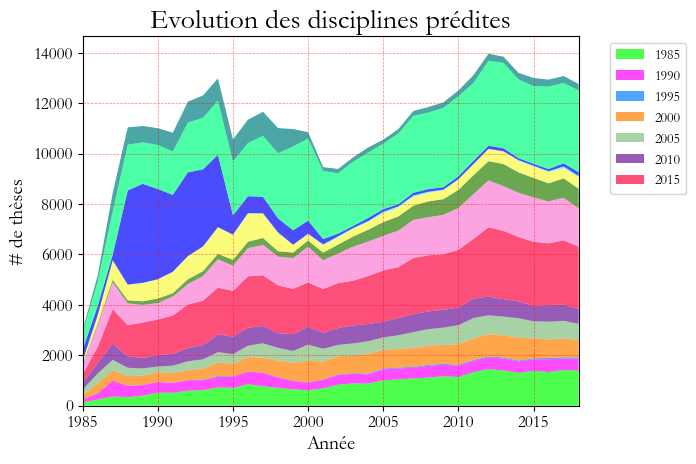

In [44]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=0.7)
font = {'family': "Garamond", 'size': 10}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=garamond_font,size=20)
plt.xlabel("Année",fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.ylabel("# de thèses",fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.xticks(fontname='Garamond', fontsize=12)
plt.yticks(fontname='Garamond', fontsize=12)
plt.grid(True)
plt.grid(color='red', linestyle='--', linewidth=0.5,alpha=0.5)
plt.show()

3.3 Exercice 3

Utilisation des mêmes données avec un graphe non transparent et une grille. Eloignement des axes et des labels.

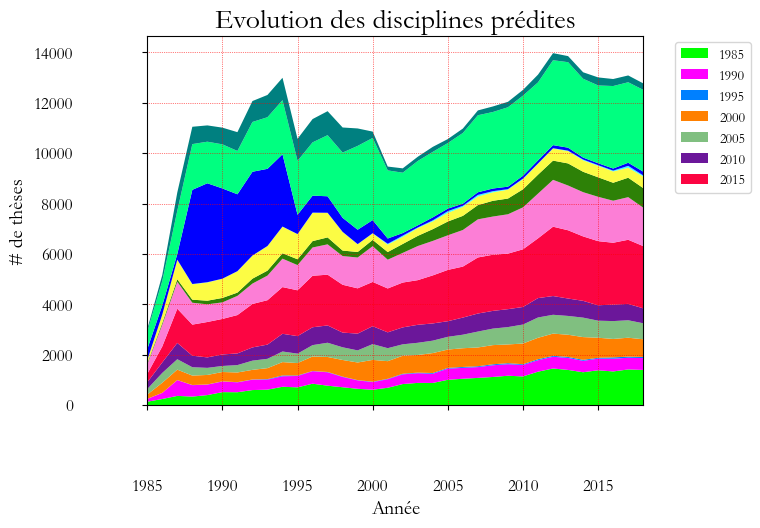

In [45]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=1)
font = {'family': "Garamond", 'size': 10}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=garamond_font,size=20)
plt.xlabel("Année", fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.ylabel("# de thèses",fontproperties=garamond_font,size=14)
plt.xticks(fontname='Garamond', fontsize=12)
plt.yticks(fontname='Garamond', fontsize=12)
plt.tick_params(axis='x', pad=50)
plt.tick_params(axis='y', pad=50)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.show()

Cette fois avec les labels légèrement inclinés de 45° en utilisant le paramètre "rotation" dans la fonction stackplot.

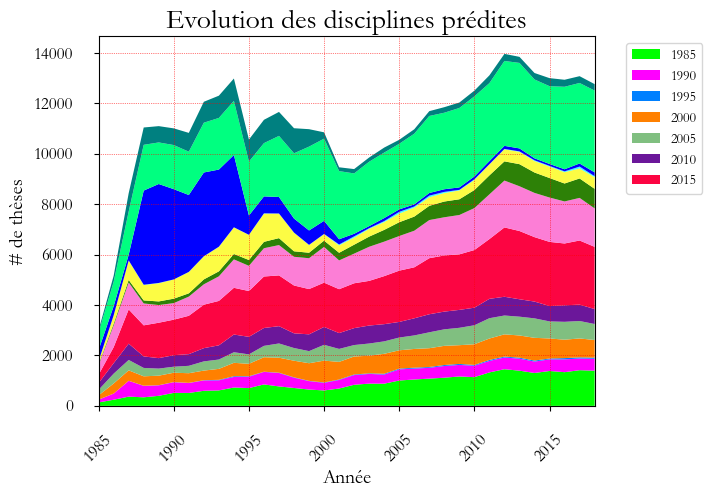

In [46]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=1)
font = {'family': "Garamond", 'size': 10}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=garamond_font,size=20)
plt.xlabel("Année", fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.ylabel("# de thèses",fontproperties=garamond_font,size=14)
plt.xticks(fontname='Garamond', fontsize=12, rotation=45)
plt.yticks(fontname='Garamond', fontsize=12)
plt.tick_params(axis='x', pad=15)
plt.tick_params(axis='y', pad=15)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.show()

3.4 Exercice 4

Reproduction du même graphique mais avec une police "Times New Roman". J'ai ajouté au début du notebook une variable dédiée pour cette police pour pouvoir la réutiliser dans le notebook. La police est ensuite précisée à chaque fois pour le titre, les labels, la légende et les ticks.
Dans cet exemple le titre et les labels sont largement agrandis, les ticks sont diminués.

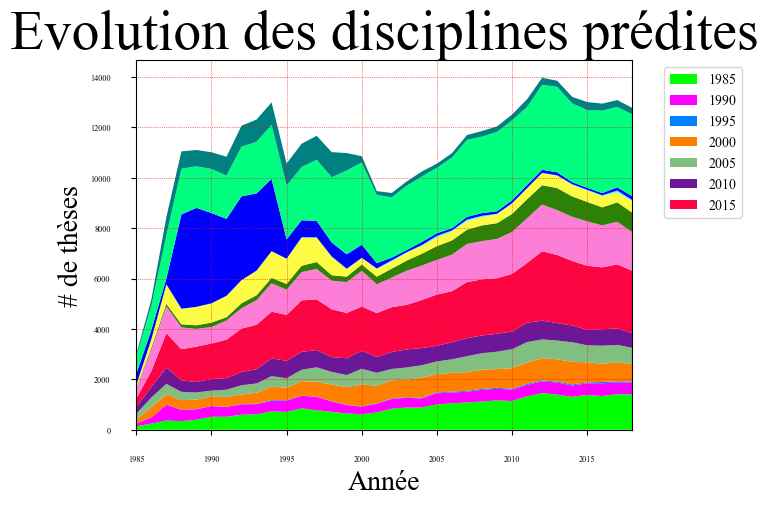

In [47]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=1)
font = {'family': "Times New Roman", "size": 10}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=font,size=40)
plt.xlabel("Année", fontproperties=font, size=20)
plt.ylabel("# de thèses",fontproperties=font,size=20)
plt.xticks(fontname='Times New Roman', fontsize=6)
plt.yticks(fontname='Times New Roman', fontsize=6)
plt.tick_params(axis='x', pad=15)
plt.tick_params(axis='y', pad=15)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.show()

pour "resserrer" le graphique on utilise "subplot" directement avant l'affichage du graphique. La taille de toutes les polices (légendes, titre, label, ticks) est réduite en conséquence.

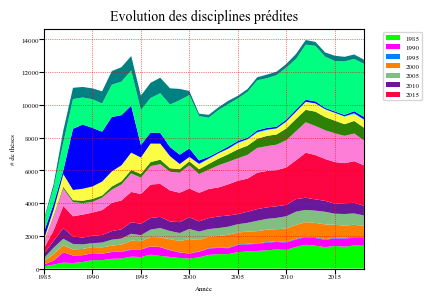

In [48]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=1)
#fig, ax = plt.subplots()
font = {'family': "Times New Roman", "size": 5}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=font,size=10)
plt.xlabel("Année", fontproperties=font, size=5)
plt.ylabel("# de thèses",fontproperties=font,size=5)
plt.xticks(fontname='Times New Roman', fontsize=5)
plt.yticks(fontname='Times New Roman', fontsize=5)
plt.tick_params(axis='x', pad=0)
plt.tick_params(axis='y', pad=0)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.subplots_adjust(left=0.0, right=0.5, bottom=0.0, top=0.5)
plt.show()

3.5 Echelle logarithmique

Utilisation de la méthode yscale("log") pour indiquer que l'échelle des y est logarithmique.


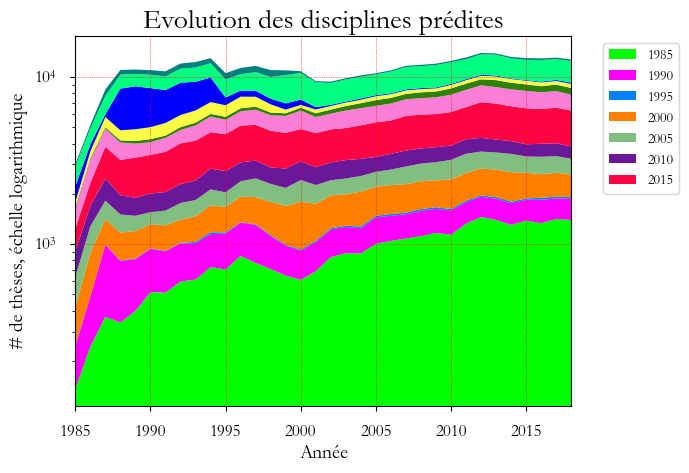

In [49]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=1)
font = {'family': "Garamond", 'size': 10}
plt.legend(loc='upper left',bbox_to_anchor=(1.05, 1),prop=font)
start_value = 1985
plt.yscale("log")
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=garamond_font,size=20)
plt.xlabel("Année", fontproperties=garamond_font, fontdict={"family": "serif","size": 14})
plt.ylabel("# de thèses, échelle logarithmique",fontproperties=garamond_font,size=14)
plt.xticks(fontname='Garamond', fontsize=12)
plt.yticks(fontname='Garamond', fontsize=12)
plt.tick_params(axis='x', pad=10)
plt.tick_params(axis='y', pad=10)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.show()

3.6 Exercice 6

Affichage du même graphe mais avec en premier la légende extérieure au graphique et à gauche, et dans le second cas sous le graphique.

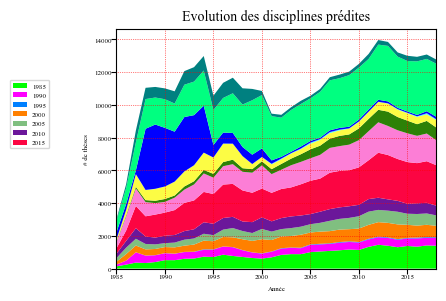

In [50]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=1)
#fig, ax = plt.subplots()
font = {'family': "Times New Roman", "size": 5}
plt.legend(loc='upper right',bbox_to_anchor=(-0.20,0.80),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=font,size=10)
plt.xlabel("Année", fontproperties=font, size=5)
plt.ylabel("# de thèses",fontproperties=font,size=5)
plt.xticks(fontname='Times New Roman', fontsize=5)
plt.yticks(fontname='Times New Roman', fontsize=5)
plt.tick_params(axis='x', pad=0)
plt.tick_params(axis='y', pad=0)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.subplots_adjust(left=0.0, right=0.5, bottom=0.0, top=0.5)
plt.show()

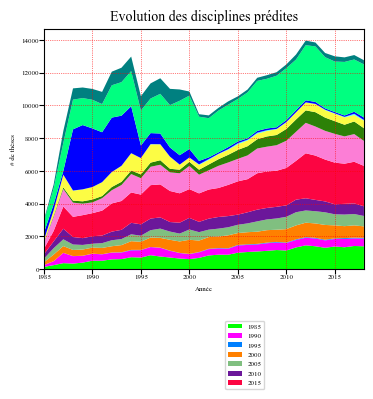

In [51]:
# affichage du stackplot
plt.stackplot(category,*values,labels=labels,colors=colors, alpha=1)
#fig, ax = plt.subplots()
font = {'family': "Times New Roman", "size": 5}
plt.legend(loc='upper right',bbox_to_anchor=(0.70,-0.2),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=font,size=10)
plt.xlabel("Année", fontproperties=font, size=5)
plt.ylabel("# de thèses",fontproperties=font,size=5)
plt.xticks(fontname='Times New Roman', fontsize=5)
plt.yticks(fontname='Times New Roman', fontsize=5)
plt.tick_params(axis='x', pad=0)
plt.tick_params(axis='y', pad=0)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.subplots_adjust(left=0.0, right=0.5, bottom=0.0, top=0.5)
plt.show()

3.7 Exercice 7

Le changement des couleurs est automatique. A chaque exécution du rapport la palette de couleurs change automatiquement. C'est une fonctionnalité de l'outil utilisé : distincipy

3.8 Exercice 8

Inversion de l'ordre des disciplines. La discipline "Biologie" est la plus proche de l'axe des abscisses alors qu'elle est en dernier, le plus haut, dans les schémas précédents.

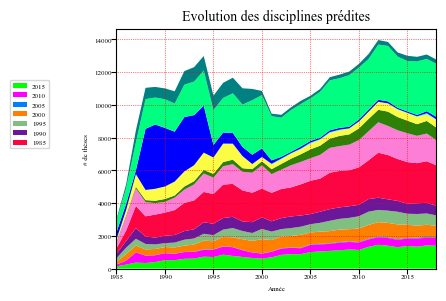

In [52]:
# inverse les disciplines
labels_inverses= list(reversed(labels))

# affiche le stackplot
plt.stackplot(category,*values,labels=labels_inverses,colors=colors, alpha=1)
font = {'family': "Times New Roman", "size": 5}
plt.legend(loc='upper right',bbox_to_anchor=(-0.20,0.80),prop=font)
start_value = 1985
plt.xlim(start_value, max(category))  # Spécifiez la valeur de départ et la valeur maximale de la catégorie
plt.title("Evolution des disciplines prédites",fontproperties=font,size=10)
plt.xlabel("Année", fontproperties=font, size=5)
plt.ylabel("# de thèses",fontproperties=font,size=5)
plt.xticks(fontname='Times New Roman', fontsize=5)
plt.yticks(fontname='Times New Roman', fontsize=5)
plt.tick_params(axis='x', pad=0)
plt.tick_params(axis='y', pad=0)
plt.grid(True)
plt.grid(color='red', linestyle=':', linewidth=0.5,alpha=1)
plt.subplots_adjust(left=0.0, right=0.5, bottom=0.0, top=0.5)
plt.show()

3.9 Exercice 9

Nous représentons maintenant l'évolution au cours du temps pour chaque discipline prise séparément. Le curseur permet de sélectionner la discipline.

In [57]:
# Ajout des traces
fig=go.Figure()
for i in range(len(labels)):
    fig.add_trace(go.Scatter(visible=False,
                             x=category,
                             y=values[i],
                             name=labels[i],
                             mode="none",
                             fill="tozeroy"))

# Rendre visible une trace
fig.data[0].visible=True

# Création du slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False]*len(fig.data)}], 
        label=labels[i]
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Choix de la discipline : "},
    pad={"t": 50},
    steps=steps
)]
fig.update_layout(sliders=sliders)

# Affichage du graphique
fig.update_layout(  title_text = "Evolution du # de thèses par discipline, de 1985 à 2018",
                    title_font_color="#444",
                    title_font_family="garamond_font",
                    title_font_size=25,
                    showlegend=True,
                    legend_bgcolor="#FEE",
                    legend_title_text = "Discipline",
                    margin_pad = 0
                    )
fig.update_xaxes(tickformat='%Y',color="#444", dividercolor="#222", tickfont=dict(family="garamond_font", size=15 ))
fig.update_yaxes(tickformat='%Y',color="#444", dividercolor="#222", tickfont=dict(family="garamond_font", size=15 ))
fig.show()

In [ ]:
# Exportez le graphique au format HTML avec des widgets
fig.write_html('C:/Users/Robin/hello/evol_discipline_avec_slider.html', include_plotlyjs='directory')

In [58]:
import plotly.graph_objects as go
import numpy as np

# Création du graphique initial
fig = go.Figure()

# Ajout des traces
for i in range(len(labels)):
    fig.add_trace(go.Scatter(
        visible=False,
        x=category,
        y=values[i],
        name=labels[i],
        mode="none",
        fill="tozeroy"
    ))

# Rendre visible une trace
fig.data[0].visible = True

# Configuration du sélecteur
select_buttons = [
    {'label': label, 'method': 'update', 'args': [{'visible': [i == j for j in range(len(labels))]}]}
    for i, label in enumerate(labels)
]

# Création du sélecteur
selector = widgets.Dropdown(
    options=labels,
    value=labels[0],
    description='Discipline:',
    disabled=False,
)

# Fonction de mise à jour du graphique en fonction du sélecteur
def update_figure(change):
    selected_labels = change["new"]
    selected_index = labels.index(selected_labels)
    for i in range(len(labels)):
        fig.data[i].visible = (i == selected_index)
    fig.update_layout()
    fig.show()

# Fonction de gestion de l'événement de changement du sélecteur
def on_select_change(change):
    if change['name'] == 'value' and change['new']:
        update_figure(change['new'])

# Attacher la fonction de gestion de l'événement au sélecteur
selector.observe(update_figure,names="value")

# Configuration du layout
fig.update_layout(
    title_text="Evolution du # de thèses par discipline, de 1985 à 2018",
    title_font_color="#444",
    title_font_family="garamond",
    title_font_size=25,
    showlegend=True,
    legend_bgcolor="#FEE",
    legend_title_text="Discipline",
    margin_pad=0,
    xaxis=dict(
        tickformat='%Y',
        color="#444",
        dividercolor="#222",
        tickfont=dict(family="garamond", size=15)
    ),
    yaxis=dict(
        tickformat='%Y',
        color="#444",
        dividercolor="#222",
        tickfont=dict(family="garamond", size=15)
    )
)

# Afficher le sélecteur et le graphique
display(selector)
fig.show()




Dropdown(description='Discipline:', options=("Science de l'ingénieur", 'Science de la Terre', "Sciences de l'é…

Export des graphes plotly au format html en incluant les graphes plotly comme widget

In [ ]:
# Exportez le graphique au format HTML avec des widgets
fig.write_html('C:/Users/Robin/hello/evol_discipline_avec_selector.html', include_plotlyjs='directory')